# Data Generator

- Stephen W. Thomas
- Used for MMA 869, MMAI 869, and GMMA 869

In [1]:
import datetime
print(datetime.datetime.now())

2022-07-15 09:58:02.152377


In [2]:
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.1.


In [4]:
from sklearn.datasets import make_classification
import random
import numpy as np
import matplotlib.pyplot as plt

# Marketing Data

For educational purposes, we'll generate a synthetic dataset, rather than using a real one, at first. We'll create a dataset that has two features, both informative, with some overlap, but not much.

In [5]:


# After experiementation, this random state generates a "good looking" dataset
r = 4184

X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, flip_y=0.09, class_sep = 1.1, random_state=r);

X1 = pd.DataFrame(X, columns=['Age', 'Income'])
y1 = pd.Series(y, name='Bought')
df = pd.concat([X1, y1], axis=1)
df.to_csv('generated_marketing.csv', index=False)

# Extreme Imbalanced

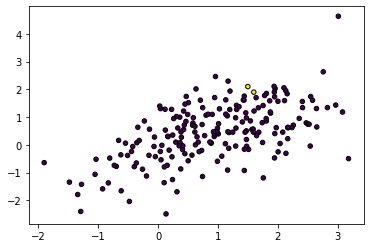

In [6]:
r = 4186

X0, y0 = make_classification(n_samples=200, 
                           n_features=2, 
                           n_redundant=0, 
                           n_informative=2,
                           n_clusters_per_class=2, 
                           weights=[0.99, 0.01],
                           flip_y=0.0, 
                           class_sep = 0.5, 
                           shift=1.0,
                           scale=1.0,
                           random_state=r);# Extreme Embalanced

# The above generated data was good, but after manual inspection,
# I decided to add two more points manually, to really test
# how algos do with imbalanced data
y = np.zeros(200)
y = np.append(y, 1)
y = np.append(y, 1)

X = X0
X = np.vstack([X, [1.5, 2.1]])
X = np.vstack([X, [1.6, 1.9]])

plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')

In [7]:
X1 = pd.DataFrame(X, columns=['Age', 'Income'])
y1 = pd.Series(y, name='Bought')
df = pd.concat([X1, y1], axis=1)
df.to_csv('generated_marketing_extreme.csv', index=False)